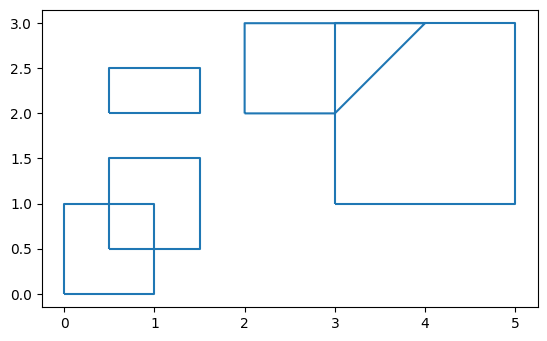

In [317]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.ops import unary_union

# Define the coordinates for the polygons
polygon1_coords = [(0, 0), (1, 0), (1, 1), (0, 1)]
polygon2_coords = [(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)]
polygon3_coords = [(2, 2), (3, 2), (4, 3), (2, 3)]
polygon4_coords = [(3, 1), (5, 1), (5, 3), (3, 3)]
polygon5_coords = [(0.5, 2), (1.5, 2), (1.5, 2.5), (.5, 2.5)]


# Create Polygon patches and add them to the axes
polygon1 = Polygon(polygon1_coords)
polygon2 = Polygon(polygon2_coords)
polygon3 = Polygon(polygon3_coords)
polygon4 = Polygon(polygon4_coords)
polygon5 = Polygon(polygon5_coords)

# combining polygons
combined_polygons = [polygon1, polygon2, polygon3, polygon4, polygon5]

# # plot them
gpd.GeoSeries(combined_polygons).boundary.plot()
plt.show()

/home/local/KHQ/s.erattakulangara/anaconda3/envs/tiffexp/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


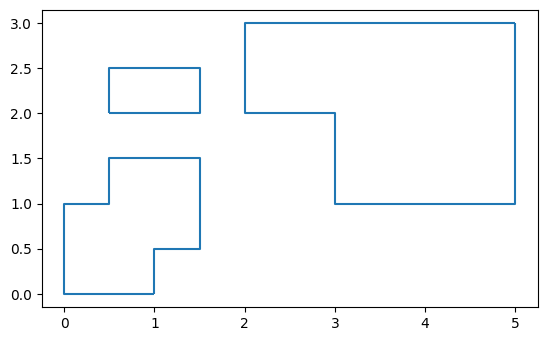

In [316]:
# working code for combining the shapes and generating a new array.
pop_list = []
merged_polygons = []
all_samples = combined_polygons
for i, polygonx in enumerate(combined_polygons):
    overlap = False
    for j in range(i+1, len(combined_polygons)):
        if polygonx.intersection(combined_polygons[j]):
            merged_polygon = unary_union([combined_polygons[i], combined_polygons[j]])
            merged_polygons.append(merged_polygon)
            if j not in pop_list:
                pop_list.append(j)
            if i not in pop_list:
                pop_list.append(i)


def remove_indexes(lst, indexes):
    # Sort the indexes in descending order
    indexes.sort(reverse=True)

    # Remove the elements at the specified indexes
    for index in indexes:
        if 0 <= index < len(lst):
            del lst[index]

    return lst


new_list = remove_indexes(all_samples, pop_list)

gpd.GeoSeries(merged_polygons+new_list).boundary.plot()
plt.show()

In [320]:
for sample in combined_polygons:
    rlist = list(sample.exterior.coords)
    modified_list = [(x, y, 0.0) for x, y in rlist]
    print(modified_list)

[(0.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 1.0, 0.0), (0.0, 1.0, 0.0), (0.0, 0.0, 0.0)]
[(0.5, 0.5, 0.0), (1.5, 0.5, 0.0), (1.5, 1.5, 0.0), (0.5, 1.5, 0.0), (0.5, 0.5, 0.0)]
[(2.0, 2.0, 0.0), (3.0, 2.0, 0.0), (4.0, 3.0, 0.0), (2.0, 3.0, 0.0), (2.0, 2.0, 0.0)]
[(3.0, 1.0, 0.0), (5.0, 1.0, 0.0), (5.0, 3.0, 0.0), (3.0, 3.0, 0.0), (3.0, 1.0, 0.0)]
[(0.5, 2.0, 0.0), (1.5, 2.0, 0.0), (1.5, 2.5, 0.0), (0.5, 2.5, 0.0), (0.5, 2.0, 0.0)]


<Axes: >

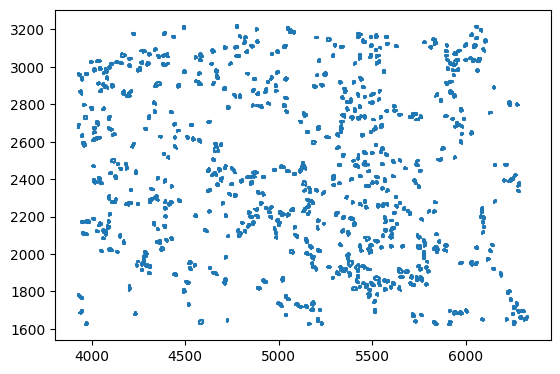

In [6]:
# convert the json datapoints to a plot
import json
from shapely.geometry import Polygon
import geopandas as gpd

with open('overlap_nuclei.json', 'r') as json_file:
    all_data = json.load(json_file)

points = []
polygons = []
for sample in all_data:
    points.append(sample['points'])
for sample in points:
    polygons.append(Polygon(sample))

gpd.GeoSeries(polygons).boundary.plot()